# Dimensional Reduction: I

*Davide Gerosa (Milano-Bicocca)* 

##### Reading:

- [Textbook](http://press.princeton.edu/titles/10159.html) Chapter 7.

This course is based on previous work by many people. See [here]((https://github.com/dgerosa/astrostatistics_bicocca_2022/blob/main/README.md) for credits.


## Curse of Dimensionality <a class="anchor" id="one"></a>

You really want to buy a car. Like, right now--you don't want to wait. But... you are picky, and have certain things that you would like it to have. 

Each of those things has a probability between 0 and 1 of being on the the car dealer's lot. You want a red car, which has a probability of being on the lot of $p_{\rm red}$; you want good gas mileage, $p_{\rm gas}$; you want leather seats, $p_{\rm leather}$; and you want a sunroof, $p_{\rm sunroof}$. The probability that the dealer has a car on the lot that meets all of those requirements is 

$$p_{\rm red} \times p_{\rm gas} \times p_{\rm leather} \times p_{\rm sunroof},$$

or $p^n$ where $n$ is the number of features (assuming equal probability for each).

If the probability of each of these is $50\%$, then the probability of you driving off with your car of choice is **only $0.5\times0.5\times0.5\times0.5 = 0.0625$**. Not very good. Imagine if you also wanted other things. **This is the [Curse of Dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality).**

Let's illustrate the curse of dimensionality with two figures from [here.](https://medium.freecodecamp.org/the-curse-of-dimensionality-how-we-can-save-big-data-from-itself-d9fa0f872335)

* **In the first example we are trying to find a box holding some treasure, which gets harder and harder with more dimensions, despite there just being 5 boxes in each dimension:**
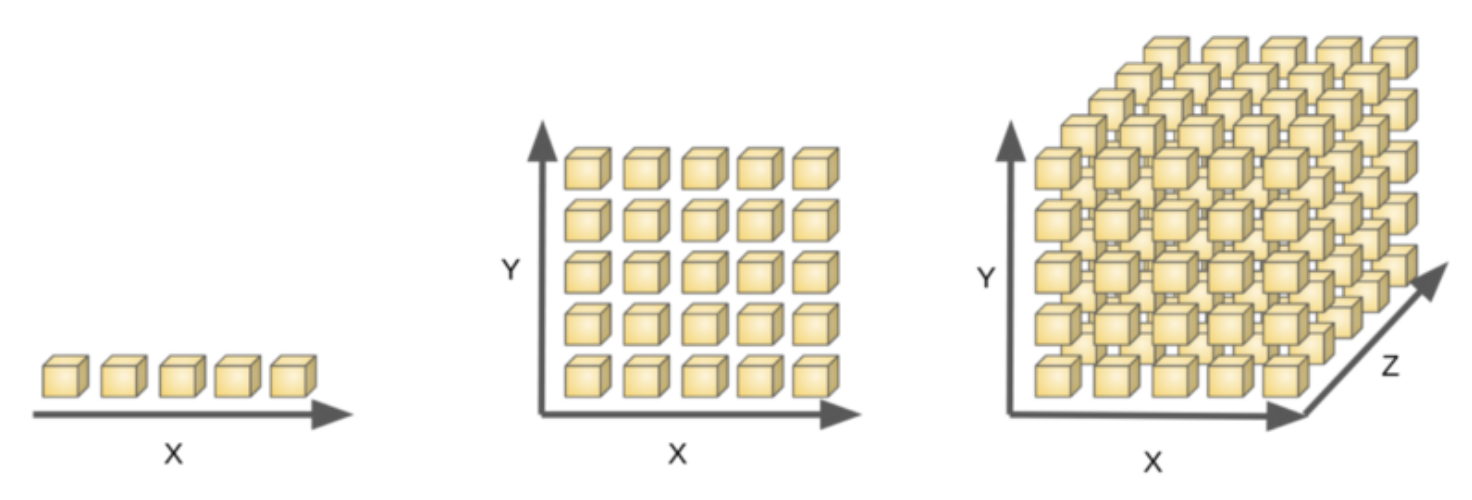

* **In the next example we inscribe a circle in a square. The area outside of the circle grows larger and larger as the number of dimensions increase:**
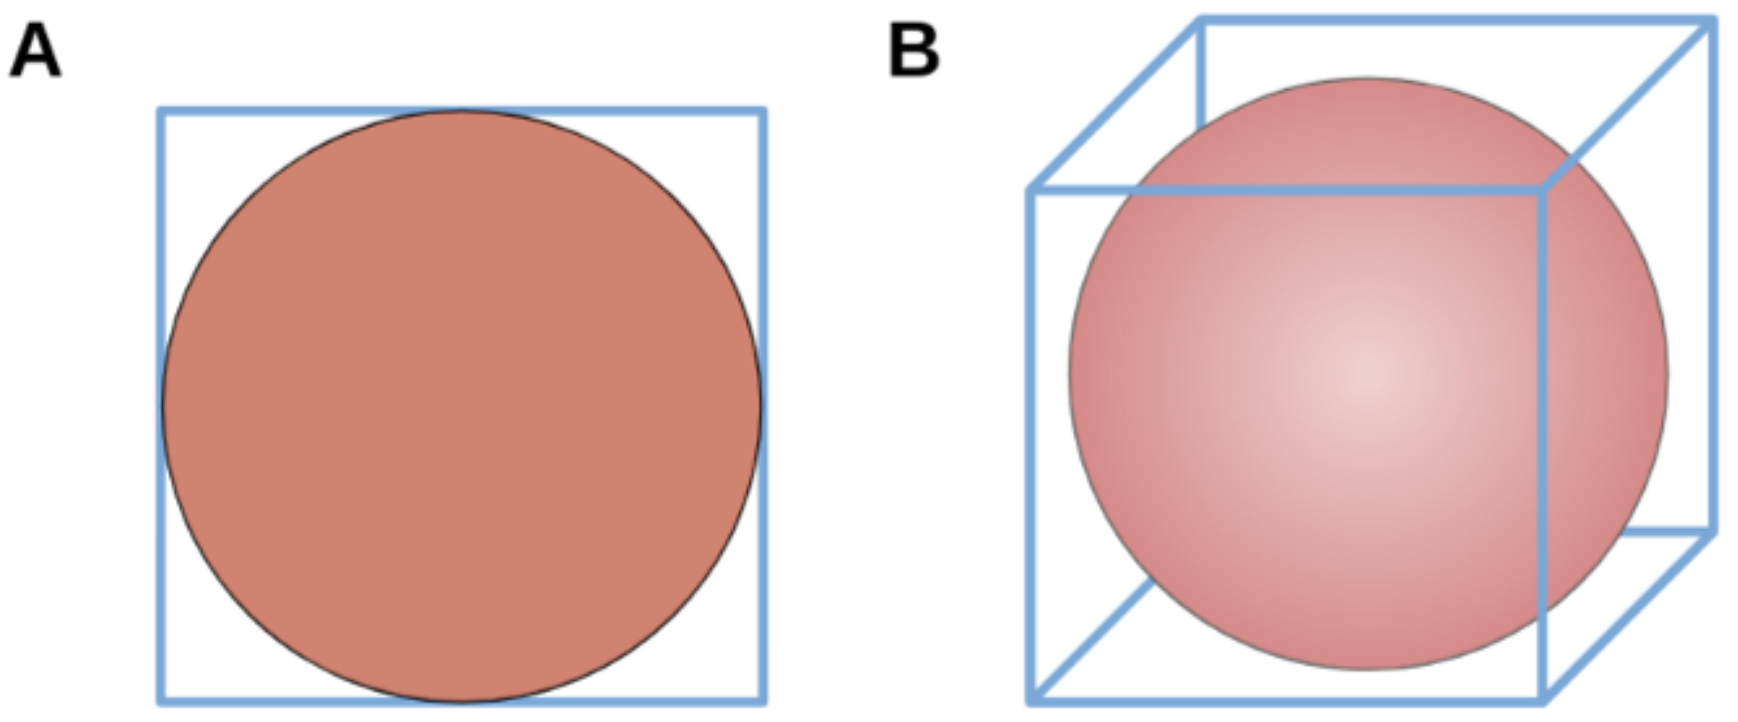

* Mathematically we can describe this as: 
> the more dimensions that your data span, the more points are needed to uniformly sample the space.  
* Another consequence of this is the general statement that most of the volume of a $D$-dimensional hypercube is in the corners!

Let's work this out mathematically and numerically. For $D$ dimensions with coordinates $[-1,1]$ (i.e. in a hypercube), the fraction of points in a hypersphere (with radius $r$, as illustrated above) is

$$f_D = \frac{V_D(r)}{(2r)^D} = \frac{\pi^{D/2}}{D2^{D-1}\Gamma(D/2)}$$

which tends to $0$ as $D$ tends to infinity! 

*** This was a homework from a few lectures ago...*** [Here](https://davidegerosa.com/nsphere/) is the solution, where I compute the volume with a Monte Carlo


D=2	N=1000000	N_in=784931	V=3.13972		Sol=3.14159		diff=0.00059	t=0.06s
D=3	N=1000000	N_in=523114	V=4.18491		Sol=4.18879		diff=0.00093	t=0.07s
D=4	N=1000000	N_in=308512	V=4.93619		Sol=4.93480		diff=0.00028	t=0.09s
D=5	N=1000000	N_in=163911	V=5.24515		Sol=5.26379		diff=0.00354	t=0.11s
D=6	N=1000000	N_in=080916	V=5.17862		Sol=5.16771		diff=0.00211	t=0.13s
D=7	N=1000000	N_in=037035	V=4.74048		Sol=4.72477		diff=0.00333	t=0.16s
D=8	N=1000000	N_in=015853	V=4.05837		Sol=4.05871		diff=0.00008	t=0.16s
D=9	N=1000000	N_in=006338	V=3.24506		Sol=3.29851		diff=0.01621	t=0.19s
D=10	N=1000000	N_in=002501	V=2.56102		Sol=2.55016		diff=0.00426	t=0.19s
D=11	N=1000000	N_in=000942	V=1.92922		Sol=1.88410		diff=0.02394	t=0.21s
D=12	N=1000000	N_in=000357	V=1.46227		Sol=1.33526		diff=0.09512	t=0.24s
D=13	N=1000000	N_in=000089	V=0.72909		Sol=0.91063		diff=0.19936	t=0.27s
D=14	N=1000000	N_in=000032	V=0.52429		Sol=0.59926		diff=0.12511	t=0.29s
D=15	N=1000000	N_in=000008	V=0.26214		Sol=0.38144		diff=0.31276	t=0.31s


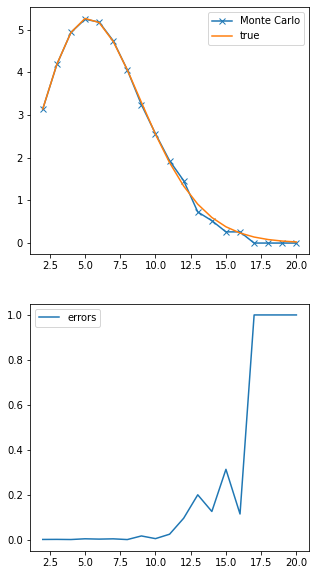

In [1]:
'''
Calculate the volume of the n-dimensional spehere a function of the dimension using a simple hit-or-miss Monte Carlo.
'''

from __future__ import print_function, division
import numpy as np
import scipy.special
import pylab as plt
import time

Dmax = 20 # Largest dimension
N = int(1e6) # Monte Carlo samples

data = []

for D in np.arange(2,Dmax+1): # Loop
    t0=time.time()

    all = np.random.uniform(-1,1, D*N).reshape(N,D) # Generate points in cube

    distance = np.sum(all**2,axis=1)**0.5 # Distance from cube center

    Ninside = np.sum(distance<=1) # Number of points within sphere
    fractioninside = Ninside/N # Fraction of points within sphere
    cube = 2**D # Volume of the cube (from -1 to 1)
    sphere = fractioninside * cube # Volume of the sphere

    solution = np.pi**(D/2) / scipy.special.gamma( D/2 + 1) # True value
    diff= np.abs(sphere-solution)/solution # Error

    t=time.time()-t0
    print("D=%i\tN=%i\tN_in=%06d\tV=%.5f\t\tSol=%.5f\t\tdiff=%.5f\tt=%.2fs" %(D,N,Ninside,sphere,solution,diff,t))

    data.append([D,sphere,solution,diff]) # Store data


# Plots...
dims, my,true,errors = np.array(data).T
fig, axs= plt.subplots(2, 1,figsize=(5,10))
axs[0].plot(dims,my,label='Monte Carlo',ls='-',marker='x')
axs[0].plot(dims,true,label='true',ls='-')
axs[1].plot(dims,errors,label='errors')
[ax.legend() for ax in axs]
plt.show()

* Note that this works in the opposite direction too: let's say you want to find "rare" objects in 10 dimensions, where we'll define rare as $<1\%$ of the population.
* Then you'll need to accept objects from $63\%$ of the distribution in all 10 dimensions! *Why $63\%$? Because it's the tenth root of $0.01$.* 
* So are those really "rare" or are they just a particular 1% of the population?

In [3]:
import numpy as np
# p^10 = 0.01, solve for p
p = (0.01)**(0.1)
print(p)

0.6309573444801932


*N.B. Dimensionality isn't just measuring $D$ features for $N$ objects. It could be a spectrum with $D$ values or an image with $D$ pixels, etc. In the book the examples used are spectra of galaxies from the SDSS project. But we can trivially insert data of our choice instead.*

For example: the SDSS comprises a sample of 357 million sources and each source has 448 measured attributes.
Let's normalize the data range to [-1,1]. On average, any box of volume 1 contains only $2^{448} / (357\times 10^{6})\sim 2$ sources!

See also [this article](https://towardsdatascience.com/the-curse-of-dimensionality-50dc6e49aa1e).

## Principal Component Analysis (PCA) <a class="anchor" id="two"></a>

In **[Principal Component Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis)** we seek to take a data set like the one shown below and apply a transform to the data such that the new axes are aligned with the maximal variance of the data. 

As can be seen in the Figure, this is basically just the same as doing *regression by minimizing the square of the perpendicular distances to the new axes*. Note that we haven't made any changes to the data, we have just defined new axes.  

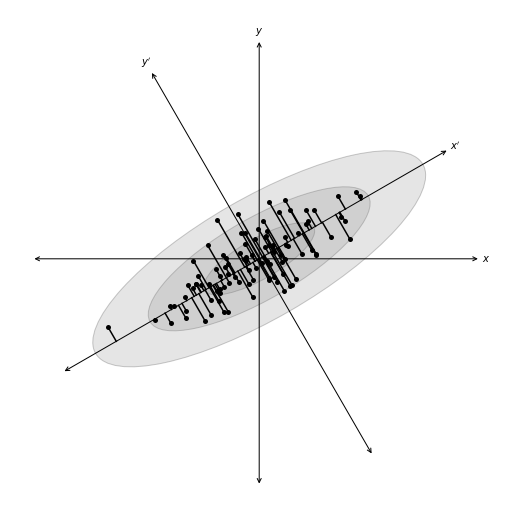

In [2]:
# Execute this cell
# Ivezic, Figure 7.2
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
from matplotlib.patches import Ellipse

#------------------------------------------------------------
# Set parameters and draw the random sample
np.random.seed(42)
r = 0.9

sigma1 = 0.25
sigma2 = 0.08
rotation = np.pi / 6
s = np.sin(rotation)
c = np.cos(rotation)

X = np.random.normal(0, [sigma1, sigma2], size=(100, 2)).T
R = np.array([[c, -s],[s, c]])
X = np.dot(R, X) #Same data, now rotated by R matrix.

#------------------------------------------------------------
# Plot the diagram
fig = plt.figure(figsize=(7, 7), facecolor='w')
ax = plt.axes((0, 0, 1, 1), xticks=[], yticks=[], frameon=False)

# draw axes
ax.annotate(r'$x$', (-r, 0), (r, 0),
            ha='center', va='center',
            arrowprops=dict(arrowstyle='<->', 
                            color='k', lw=1))
ax.annotate(r'$y$', (0, -r), (0, r),
            ha='center', va='center',
            arrowprops=dict(arrowstyle='<->', 
                            color='k', lw=1))

# draw rotated axes
ax.annotate(r'$x^\prime$', (-r * c, -r * s), (r * c, r * s),
            ha='center', va='center',
            arrowprops=dict(color='k', 
                            arrowstyle='<->', 
                            lw=1))
ax.annotate(r'$y^\prime$', (r * s, -r * c), (-r * s, r * c),
            ha='center', va='center',
            arrowprops=dict(color='k', 
                            arrowstyle='<->', 
                            lw=1))

# scatter points
ax.scatter(X[0], X[1], s=25, 
           lw=0, c='k', zorder=2)

# draw lines
vnorm = np.array([s, -c])
for v in (X.T):
    d = np.dot(v, vnorm)
    v1 = v - d * vnorm
    ax.plot([v[0], v1[0]], [v[1], v1[1]], '-k')

# draw ellipses
for sigma in (1, 2, 3):
    ax.add_patch(Ellipse((0, 0), 2 * sigma * sigma1, 2 * sigma * sigma2,
                         rotation * 180. / np.pi,
                         ec='k', fc='gray', alpha=0.2, zorder=1))

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

plt.show()

Note that the points are correlated along a particular direction which doesn't align with the initial choice of axes. So, we should rotate our axes to align with this correlation. 

We'll choose the rotation to maximize the ability to discriminate between the data points:
*   the first axis, or **principal component**, is the direction of maximal variance
*   the second principal component is orthogonal to the first component and maximizes the residual variance
*   ...

**PCA is a dimensional reduction process because we can generally account for *nearly all* of the variance in the data set with fewer than the original $K$ dimensions.** See more below.

### Derivation of PCA

We start with a data set $\{x_i\}$ that consists of $N$ objects for which we measure $K$ features. The data is initially prepared by subtracting the mean for each feature in $\{x_i\}$ and writing $X$ as a $N\times K$ matrix.

The covariance of this matrix is the $K\times K$ matrix

$$C_X=\frac{1}{N-1}X^T X.$$

(the $N-1$ term is Bessel's correction, the covariances are derived from the data themselves).

**There are off-diagonal terms if there are correlations between the measurements (e.g., maybe two of the features are temperature dependent and the measurements were taken at the same time).**


* If $R$ is a projection of the data that is aligned with the maximal variance, then we have $Y= X R$ with covariance 

$$ C_{Y} = \frac{1}{N-1} R^T X^T X R =  R^T C_X R.$$

* $r_1$ is the first principal component of $R$ (the first column) with the constraint $r_1^T r_1=1$. It can be derived using *Langrange multipliers* with the following cost function:

$$ \phi(r_1,\lambda_1) = r_1^TC_X r_1 - \lambda_1(r_1^Tr_1-1). $$

* If we take derivative of $\phi(r_1,\lambda)$ with respect to $r_1$ and set it to 0 (i.e., we extremize the cost function), then we have

$$ C_Xr_1 - \lambda_1 r_1 = 0. $$

* $\lambda_1$ (**the largest eigenvalue of the matrix**) is the root of the equation $\det(C_X -
\lambda_1 {\bf I})=0$ for which the eigenvalue is

$$ \lambda_1 =  r_1^T C_X r_1.$$

* The columns of the full matrix, $R$ are the **eigenvectors (known here as principal components)**.

* The diagonal values of $C_Y$ are the variance contained within each component.

We aren't going to go through the linear algebra more than that here, nor discuss the most efficient means of computation. See the end of 7.3.1 or go through [Karen Leighly's PCA lecture notes](http://seminar.ouml.org/lectures/principal-components-analysis/) if you want to walk through the math in more detail. **But PCA essentially boils down to eigen-analysis of data matrices, which I'm sure you have met previously in a math methods context.**

### Preparing data for PCA

1. Subtract the mean of each dimension/feature/column (to **"center"** the data)
2. Divide by the variance in each dimension/feature/column (to **"whiten"** the data)
3. (For spectra and images) normalize each sample/row to yield an integral of unity.

Below is a typical call to the PCA algorithm.  Note that this example is somewhat backwards.  We are starting with `X` and then we are making it higher dimensional--to create a mock high-$D$ data set.  Then we are applying PCA as a dimensionality reduction technique.

In [3]:
#Example call from 7.3.2
import numpy as np
from sklearn.decomposition import PCA

X = np.random.normal(size=(100,3)) # 100 points in 3D
R = np.random.random((3,10)) # projection matrix
X = np.dot(X,R) # X is now 10-dim, with 3 intrinsic dims

pca = PCA(n_components=4) # n_components can be optionally set
pca.fit(X) 

eigenvalues = pca.transform(X) # compute the subspace projection of X, 4 eigenvalues for each of the 100 samples
mean = pca.mean_ # length 10 mean of the data
eigenvectors = pca.components_ # 4x10 matrix of components, multiply each by respective eigenvalue to reconstruct

# Reconstruction of object1
# Xreconstruct[0] = mean + eigenvectors*eigenvalues[0]

print(eigenvalues.shape)
print(eigenvectors.shape)

(100, 4)
(4, 10)


To illustrate what is happening, here is a PCA reconstruction of handwritten "3s" from [Hastie et al.](https://web.stanford.edu/~hastie/ElemStatLearn/) :

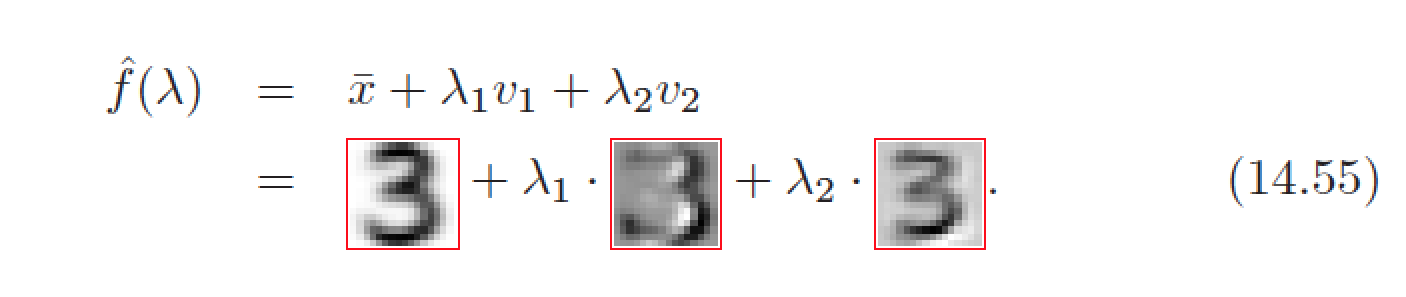

[Scikit-Learn's decomposition module](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition) has a number of [PCA type implementations](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA).

Let's now look at spectra of galaxies taken during the Sloan Digital Sky Survey.   In this sample there are 4000 spectra with flux measurements in 1000 bins.  15 example spectra are shown below and our example will use half of the spectra chosen at random.  

![Ivezic, Figure 7.1](http://www.astroml.org/_images/fig_spec_examples_1.png)

In [4]:
# Example from Andy Connolly
# See Ivezic, Figure 7.4

from sklearn.decomposition import PCA
#from sklearn.decomposition import RandomizedPCA

from astroML.datasets import sdss_corrected_spectra
from astroML.utils import pickle_results

#------------------------------------------------------------
# Download data
data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()
spectra = sdss_corrected_spectra.reconstruct_spectra(data)
wavelengths = sdss_corrected_spectra.compute_wavelengths(data)
print('Number of spectra: ' + str(len(spectra)))
print('Number of wavelength bins: ' + str(len(wavelengths)))

#----------------------------------------------------------------------
# Compute PCA
np.random.seed(500)
nrows = 2000 # We'll just look at 2000 random spectra
n_components = 5 # Do the fit with 5 components, which is the mean plus 4
ind = np.random.randint(spectra.shape[0], size=nrows)

spec_mean = spectra[ind].mean(0) # Compute the mean spectrum, which is the first component
# spec_mean = spectra[:50].mean(0)

# use Randomized PCA for speed
# pca = RandomizedPCA(n_components - 1)
pca = PCA(n_components - 1, svd_solver='randomized')
pca.fit(spectra[ind])
pca_comp = np.vstack([spec_mean, pca.components_]) # Add the mean to the components
evals = pca.explained_variance_ratio_ 
print('Expained fractional variance of data encapsulated in the eigenvalues: ' + str(evals))

Number of spectra: 4000
Number of wavelength bins: 1000
Expained fractional variance of data encapsulated in the eigenvalues: [0.889316   0.06058299 0.02481431 0.01012147]


**Now let's plot the components (eigenvectors).** The left hand panels are just the *first 5 spectra for comparison* with the *first 5 PCA components*, which are shown on the right.  They are ordered by the size of their eigenvalues.

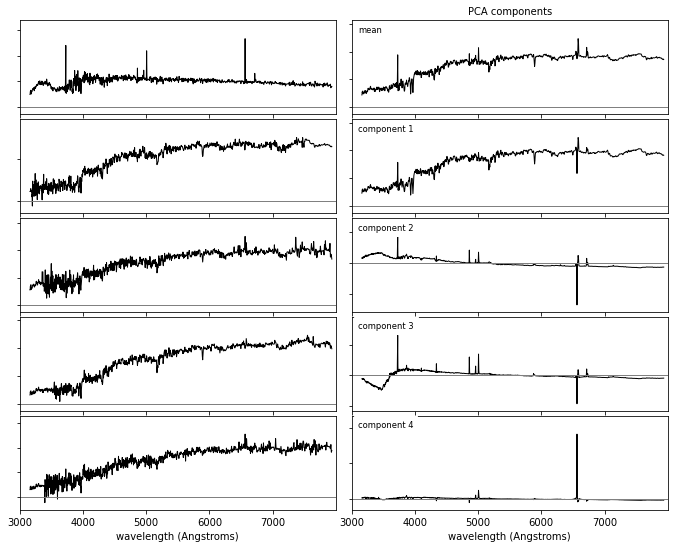

In [5]:
# Make plots
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05,
                    bottom=0.1, top=0.95, hspace=0.05)

titles = 'PCA components'

for j in range(n_components):
    
    # plot the components
    ax = fig.add_subplot(n_components, 2, 2*j+2)
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
    
    if j < n_components - 1:
        ax.xaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax.set_xlabel('wavelength (Angstroms)')
    ax.plot(wavelengths, pca_comp[j], '-k', lw=1)

    # plot zero line
    xlim = [3000, 7999]
    ax.plot(xlim, [0, 0], '-', c='gray', lw=1)
    ax.set_xlim(xlim)

    # adjust y limits
    ylim = plt.ylim()
    dy = 0.05 * (ylim[1] - ylim[0])    
    ax.set_ylim(ylim[0] - dy, ylim[1] + 4 * dy)

    # plot the first j spectra
    ax2 = fig.add_subplot(n_components, 2, 2*j+1)
    ax2.yaxis.set_major_formatter(plt.NullFormatter())
    ax2.xaxis.set_major_locator(plt.MultipleLocator(1000))
    if j < n_components - 1:
        ax2.xaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax2.set_xlabel('wavelength (Angstroms)')
    ax2.plot(wavelengths, spectra[j], '-k', lw=1)
    
    # plot zero line
    ax2.plot(xlim, [0, 0], '-', c='gray', lw=1)
    ax2.set_xlim(xlim)

    if j == 0:
        ax.set_title(titles, fontsize='medium')
    if j == 0:
        label = 'mean'
    else:
        label = 'component %i' % j

    # adjust y limits
    ylim = plt.ylim()
    dy = 0.05 * (ylim[1] - ylim[0])    
    ax2.set_ylim(ylim[0] - dy, ylim[1] + 4 * dy)

    ax.text(0.02, 0.95, label, transform=ax.transAxes,
            ha='left', va='top', bbox=dict(ec='w', fc='w'),
            fontsize='small')

plt.show()

Now let's make **scree plots**.  These plots tell us how much of the variance is explained as a function of the each eigenvector.  Our plot won't look much like the textbook figure, so I've shown it below to explain where "scree" comes from.


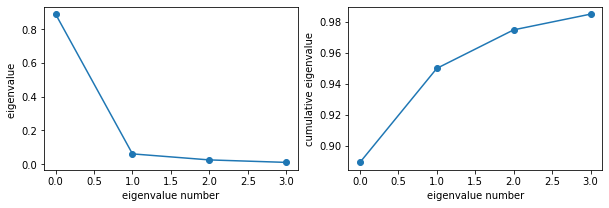

In [6]:
# Execute this cell
import numpy as np
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 3))

ax = fig.add_subplot(121)

ax.plot(np.arange(n_components-1), evals)
ax.scatter(np.arange(n_components-1), evals)

ax.set_xlabel("eigenvalue number")
ax.set_ylabel("eigenvalue ")

ax = fig.add_subplot(122)

ax.plot(np.arange(n_components-1), evals.cumsum())
ax.scatter(np.arange(n_components-1), evals.cumsum())

ax.set_xlabel("eigenvalue number")
ax.set_ylabel("cumulative eigenvalue")

plt.show()

This is with many more components (Fig 7.5 in the textbook):
![Ivezic, Figure 7.5](http://www.astroml.org/_images/fig_eigenvalues_1.png)

How much of the variance is explained ([explained_variance_ratio_](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)) by the first two components?  How about all of the components?

In [7]:
print("The first component explains {:.3f} of the variance in the data.".format(pca.explained_variance_ratio_[0]))
print("The second component explains {:.3f} of the variance in the data.".format(pca.explained_variance_ratio_[1]))
print("All components explain {:.3f} of the variance in the data.".format(sum(pca.explained_variance_ratio_)))

The first component explains 0.889 of the variance in the data.
The second component explains 0.061 of the variance in the data.
All components explain 0.985 of the variance in the data.


***This is why PCA enables dimensionality reduction. We can use samples of measured data to train a data-driven basis that better explains it.***

How many components would we need to explain 99.5% of the variance?

In [8]:
for num_feats in np.arange(1,20, dtype = int):
    pca = PCA(n_components=num_feats)
    pca.fit(spectra[ind])
    if (sum(pca.explained_variance_ratio_)>0.995):
        break
print("{:d} features are needed to explain 99.5% of the variance".format(num_feats))

8 features are needed to explain 99.5% of the variance


Note that we would need 1000 components to encode *all* of the variance (that is the number of wavelenght bins, i.e. the dimensionality of the initial problem).

There is a MUCH easier way to do this.  Just give it a number of components between 0 and 1 and it will interpret that as a percentage of the variance.

In [9]:
pca995 = PCA(n_components=0.995)
pca995.fit(spectra[ind])
print("{:d} features are needed to explain 99.5% of the variance".format(pca995.n_components_))

8 features are needed to explain 99.5% of the variance


If you ever use sklearn's PCA, note that if you give it a dataset that is too big, it won't do the full PCA, but rather an approximated one using the `svd_solver="randomized"`, but you can force it to use something else.

### Interpreting the PCA

- The output eigenvectors are ordered by their associated eigenvalues 
- The eigenvalues reflect the variance within each eigenvector
- The sum of the eigenvalues is total variance of the system
- The projection of each spectrum onto the first few eigenspectra is a compression of the data 

Once we have the eigenvectors, we can reconstruct an observed spectrum, ${x}(k)$, in the eigenvector basis, ${e}_i(k)$, as 

$$ \begin{equation}
  {x}_i(k) = {\mu}(k) + \sum_j^R \theta_{ij} {e}_j(k).
\end{equation}
$$

where $\theta_{ij}$ denote the feature amplitudes in the compressed basis. The above equation would give a full (perfect) reconstruction of the data since it uses all of the eigenvectors. But if we truncate (i.e., $j<R$), then we will have reduced the dimensionality while still reconstructing the data with relatively little loss of information.

For example, we started with $4000\times1000$ floating point numbers. If we can explain nearly all of the variance with $8$ eigenvectors, then we have reduced the problem to $4000\times8$ (the eigenspectra) + $8\times1000$ (the component weights) floating point numbers! 

We compressed the data to only $(4000\times8 + 8\times1000)/(4000\times1000)=1\%$ of what it  while retaining 99.5\% of the information! (BTW, this is the essence of how file compression works. Saying going from a wav file to mp3, or from png to jpg).

Execute the next cell to see how the reconstruction improves by adding more components.

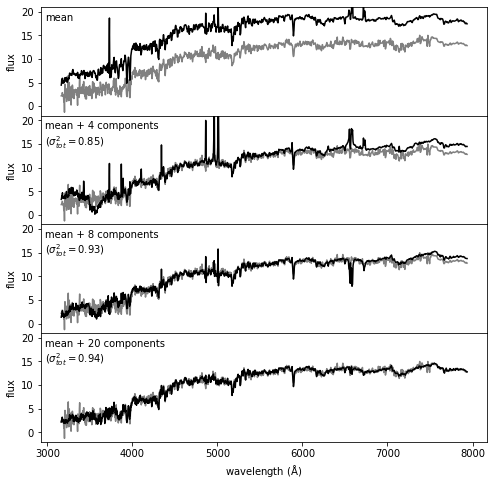

In [10]:
# Execute this cell
from sklearn.decomposition import PCA

from astroML.datasets import sdss_corrected_spectra
from astroML.decorators import pickle_results

#------------------------------------------------------------
# Download data
data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()
spectra = sdss_corrected_spectra.reconstruct_spectra(data)
wavelengths = sdss_corrected_spectra.compute_wavelengths(data)

#------------------------------------------------------------
# Compute PCA components

# Eigenvalues can be computed using PCA as in the commented code below:

#from sklearn.decomposition import PCA
#pca = PCA()
#pca.fit(spectra)
#evals = pca.explained_variance_ratio_
#evals_cs = evals.cumsum()

#  because the spectra have been reconstructed from masked values, this
#  is not exactly correct in this case: we'll use the values computed
#  in the file compute_sdss_pca.py
evals = data['evals'] ** 2
evals_cs = evals.cumsum()
evals_cs /= evals_cs[-1]
evecs = data['evecs']
spec_mean = spectra.mean(0)

#------------------------------------------------------------
# Find the coefficients of a particular spectrum
spec = spectra[1]
coeff = np.dot(evecs, spec - spec_mean)

#------------------------------------------------------------
# Plot the sequence of reconstructions
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(hspace=0)

for i, n in enumerate([0, 4, 8, 20]):
    ax = fig.add_subplot(411 + i)
    ax.plot(wavelengths, spec, '-', c='gray')
    ax.plot(wavelengths, spec_mean + np.dot(coeff[:n], evecs[:n]), '-k')

    if i < 3:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    ax.set_ylim(-2, 21)
    ax.set_ylabel('flux')

    if n == 0:
        text = "mean"
    elif n == 1:
        text = "mean + 1 component\n"
        text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]
    else:
        text = "mean + %i components\n" % n
        text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]

    ax.text(0.01, 0.95, text, ha='left', va='top', transform=ax.transAxes)

fig.axes[-1].set_xlabel(r'${\rm wavelength\ (\AA)}$')
plt.show()

### Caveats

* **PCA is a linear process**, whereas the variations in the data may not be.  So it may not always be appropriate to use and/or may require a relatively large number of components to fully describe any non-linearity.
* Note also that **PCA can be very impractical for large data sets** which exceed the memory per core as the computational requirement goes as $\mathscr{O}(D^3$) and the memory requirement goes as $\mathscr{O}(2D^2)$.


### How many components should I keep?

- We know how to answer this question already... Cross validation.  The answer of course depends on what you need to those components for.
- As a rule of thumb, one can use the scree plot and see where the curve becomes steep. If the gradient in the scree plot is close to zero, it means that adding more components doesn't add much new information. 


### Missing Data
We have assumed so far that there is no missing data (e.g., bad pixels in the spectrum, etc.).  But often the data set is incomplete. Once we have to PCAs, we can can actually use them to determine missing values.  

An example is shown below.
* Here, black are the observed spectra.
* Gray are the regions where we have no data.
* Blue is the PCA reconstruction, including the regions where there are no data. 

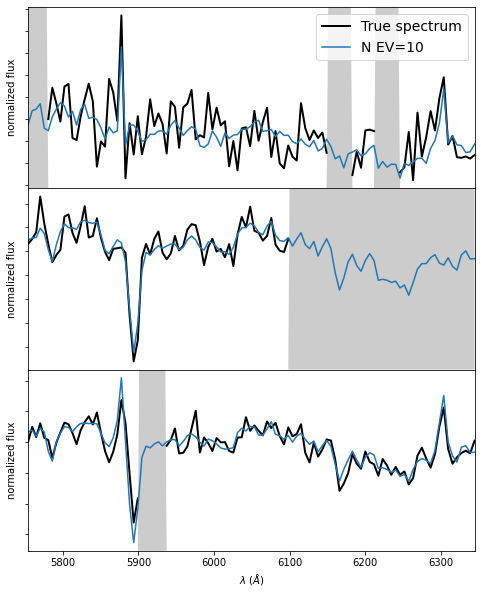

In [11]:
# Execute this cell
from matplotlib import ticker

from astroML.datasets import fetch_sdss_corrected_spectra
from astroML.datasets import sdss_corrected_spectra

#------------------------------------------------------------
# Get spectra and eigenvectors used to reconstruct them
data = fetch_sdss_corrected_spectra()
spec = sdss_corrected_spectra.reconstruct_spectra(data)
lam = sdss_corrected_spectra.compute_wavelengths(data)
evecs = data['evecs']
mu = data['mu']
norms = data['norms']
mask = data['mask']

#------------------------------------------------------------
# plot the results
i_plot = ((lam > 5750) & (lam < 6350))
lam = lam[i_plot]

specnums = [20, 8, 9]
subplots = [311, 312, 313]

fig = plt.figure(figsize=(8, 10))
fig.subplots_adjust(hspace=0)

for subplot, i in zip(subplots, specnums):
    ax = fig.add_subplot(subplot)

    # compute eigen-coefficients
    spec_i_centered = spec[i] / norms[i] - mu
    coeffs = np.dot(spec_i_centered, evecs.T)

    # blank out masked regions
    spec_i = spec[i]
    mask_i = mask[i]
    spec_i[mask_i] = np.nan

    # plot the raw masked spectrum
    ax.plot(lam, spec_i[i_plot], '-', color='k', lw=2,
            label='True spectrum')

    # plot reconstruction
    for nev in [10]:
        if nev == 0:
            label = 'mean'
        else:
            label = 'N EV=%i' % nev
        spec_i_recons = norms[i] * (mu + np.dot(coeffs[:nev], evecs[:nev]))
        ax.plot(lam, spec_i_recons[i_plot], label=label)

    # plot shaded background in masked region
    ylim = ax.get_ylim()
    mask_shade = ylim[0] + mask[i][i_plot].astype(float) * ylim[1]
    plt.fill(np.concatenate([lam[:1], lam, lam[-1:]]),
             np.concatenate([[ylim[0]], mask_shade, [ylim[0]]]),
             lw=0, fc='k', alpha=0.2)

    ax.set_xlim(lam[0], lam[-1])
    ax.set_ylim(ylim)
    ax.yaxis.set_major_formatter(ticker.NullFormatter())

    if subplot == 311:
        ax.legend(loc=1, prop=dict(size=14))

    ax.set_xlabel('$\lambda\ (\AA)$')
    ax.set_ylabel('normalized flux')

plt.show()

Which, if you ask me, is awesome.

How does this work? **PCA learns a data-driven basis that is a linear combination of features that best explain the observed data.** So it uses correlations across the features, which in this case are wavelengths. Those correlated features can be used to **interpolate across or reconstruct missing data**. 

The amplitudes of the reconstructed spectra in the compressed/PCA basis are given by

$$ \theta_i = \sum_j M^{-1}_{ij}F_j$$

where

$$ M_{ij} = \sum_k \mathbf{w}(k)\mathbf{e}_i(k)\mathbf{e}_j(k), \quad F_j = \sum_k \mathbf{w}(k)\mathbf{x}^\mathrm{obs}(k)\mathbf{e}_j(k)$$

and 
* $\sum_k$ sums over wavelengths or data features, 
* $\mathbf{x}^\mathrm{obs}(k)$ is the observed spectrum that is padded to include arbitrary entries for missing data, 
* $\mathbf{w}(k)$ are data weights that are $0$ for the missing data and $1/\sigma^2$ for the measured data, 
* $\mathbf{e}_i(k)$ are eigen-spectra.

With all of these in place, the PCA reconstruction of the missing data can be computed simply as $\sum_i \theta_i \mathbf{e}_i$.

The example that we have been using above is ***spectral PCA***.  Some examples from the literature include:
- [Francis et al. 1992](http://articles.adsabs.harvard.edu/cgi-bin/nph-iarticle_query?1992ApJ...398..476F&amp;data_type=PDF_HIGH&amp;whole_paper=YES&amp;type=PRINTER&amp;filetype=.pdf)
- [Connolly et al. 1995](http://articles.adsabs.harvard.edu/cgi-bin/nph-iarticle_query?1995AJ....110.1071C&amp;data_type=PDF_HIGH&amp;whole_paper=YES&amp;type=PRINTER&amp;filetype=.pdf)
- [Yip et al. 2004](http://iopscience.iop.org/article/10.1086/425626/meta;jsessionid=31BB5F11B85D2BF4180834DC71BA0B85.c3.iopscience.cld.iop.org)

Pusar profiles look like this (http://iopscience.iop.org/article/10.1086/425626/meta;jsessionid=31BB5F11B85D2BF4180834DC71BA0B85.c3.iopscience.cld.iop.org))
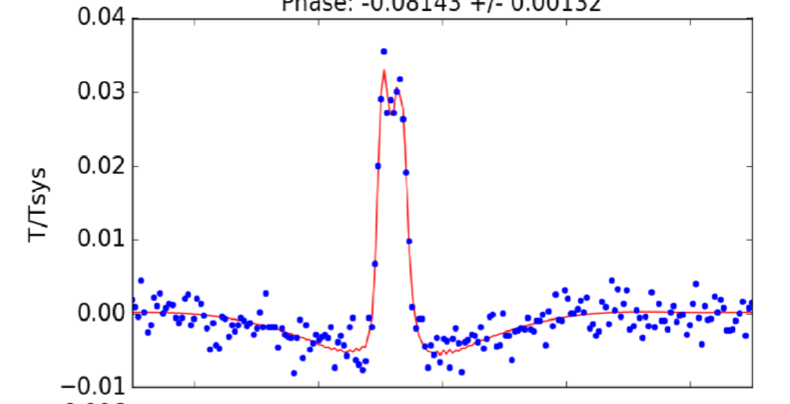

and these are the eigenpulses:
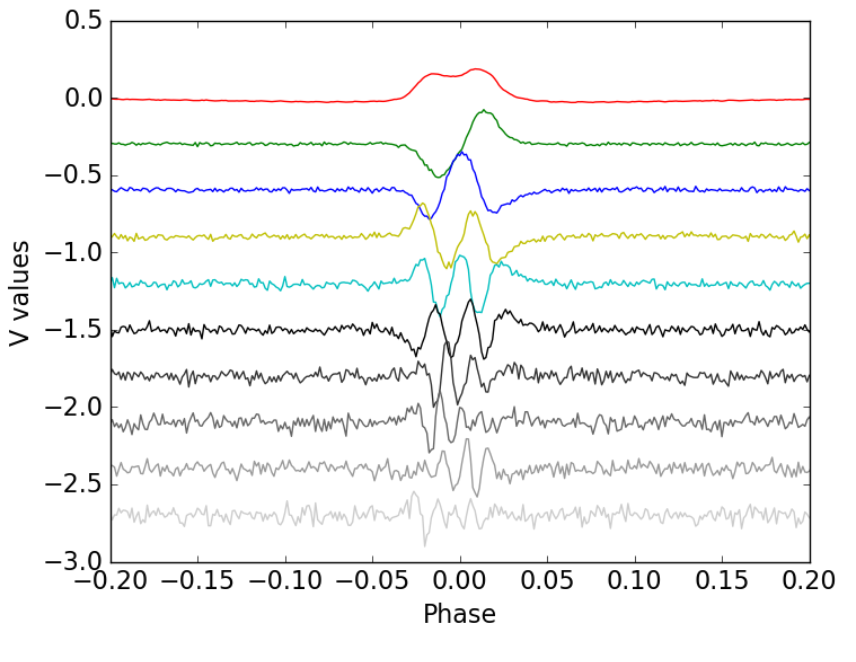

Both figures from [Yip et al. 2004].

One can also do PCA on features that aren't ordered (as they were for the spectra).  E.g., if you have $D$ different parameters measured for your objects.  A classic example in astronomy is
[Boroson & Green 1992](http://articles.adsabs.harvard.edu/cgi-bin/nph-iarticle_query?1992ApJS...80..109B&amp;data_type=PDF_HIGH&amp;whole_paper=YES&amp;type=PRINTER&amp;filetype=.pdf), and other more recent examples use it to learn about [pulsar pulse-shape variations](https://arxiv.org/abs/1707.08581).

Steve Taylor and I used PCA to learn a data-driven basis of binary black-hole demoragphic distributions for gravitational-wave population inference ([Taylor and Gerosa 2018]((https://arxiv.org/abs/1806.08365))).

In density estimation, you could use PCA to extract the eigenmodes of a pdf. 

***At home*** You could revise the GRB excercise from our last lecture and see if PCA gives something better/nicer.

## Non-negative Matrix Factorization (NMF) <a class="anchor" id="three"></a>

One of the biggest drawbacks of PCA is that the eigenvectors are defined relative to the mean data vector, resulting in principal components that can be positive or negative. But for many physical systems we know a-priori that the data can be represented as a linear sum of positive components, e.g., spectra, or the pdfs of physical properties of events. 

**[Non-negative Matrix Factorization (NMF)](https://en.wikipedia.org/wiki/Non-negative_matrix_factorization)** treats the data as a linear sum of positive-definite components. 

NMF assumes that any data matrix with all positive elements can be factored into two matrices, $W$ and $Y$, with

$$ X = W Y, $$

where both $W$ and $Y$ are non-negative. 

So, $WY$ is an approximation of $X$. Minimizing the reconstruction error $|| (X - W Y)^2 ||$, 
nonnegative bases can be derived through an iterative process.

Note, however, that the iterative process does not guarantee nonlocal minima (like $K$-means and EM), but using 
random initialization and cross-validation can be used to find the global minimum.

An example from the astronomy literature is [Allen et al. 2008](http://arxiv.org/abs/0810.4231).

In Scikit-Learn the [NMF implementation](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html) looks like (...don't worry about warnings):

In [12]:
# Execute this cell
from sklearn.decomposition import NMF

X = np.random.random((100,10)) # 100 points in 10-D, all +ve
nmf = NMF(n_components=3)
nmf.fit(X)

W = nmf.transform(X) # project to 3 dimension
Y = nmf.components_ # 3x10 array of components
err = nmf.reconstruction_err_ # how well 3 components capture the data

#print(W)
#print(Y)
#print(err)

/Users/dgerosa/box/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


An example (and comparison to PCA) is given below.

In [13]:
# Execute the next 2 cells
# Example from Figure 7.4
# Author: Jake VanderPlas
# License: BSD
#from sklearn.decomposition import RandomizedPCA

from astroML.datasets import sdss_corrected_spectra
from astroML.decorators import pickle_results

#------------------------------------------------------------
# Download data
data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()
spectra = sdss_corrected_spectra.reconstruct_spectra(data)
wavelengths = sdss_corrected_spectra.compute_wavelengths(data)

/Users/dgerosa/box/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


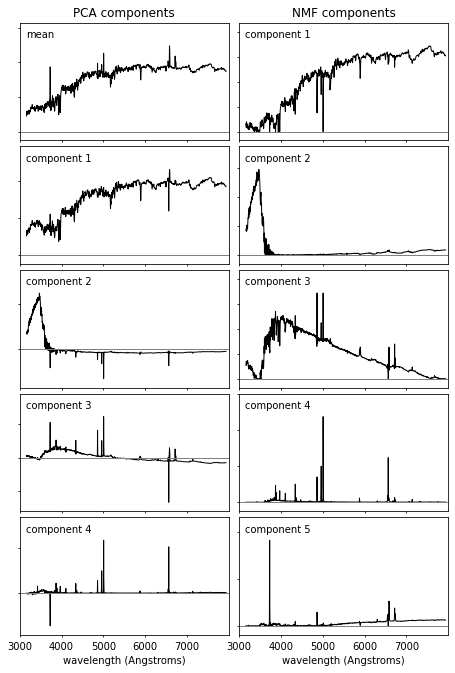

In [14]:
#----------------------------------------------------------------------
# Compute PCA, and NMF components
def compute_PCA_NMF(n_components=5):
    spec_mean = spectra.mean(0)

    # PCA: use randomized PCA for speed 
    #pca = RandomizedPCA(n_components - 1)
    pca = PCA(n_components - 1,svd_solver='randomized')
    pca.fit(spectra)
    pca_comp = np.vstack([spec_mean, pca.components_])

    # NMF requires all elements of the input to be greater than zero
    spectra[spectra < 0] = 0
    nmf = NMF(n_components)
    nmf.fit(spectra)
    nmf_comp = nmf.components_

    return pca_comp, nmf_comp

n_components = 5
decompositions = compute_PCA_NMF(n_components)

#----------------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05,
                    bottom=0.1, top=0.95, hspace=0.05)

titles = ['PCA components', 'NMF components']

for i, comp in enumerate(decompositions):
    for j in range(n_components):
        ax = fig.add_subplot(n_components, 3, 3 * j + 1 + i)

        ax.yaxis.set_major_formatter(plt.NullFormatter())
        ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
        if j < n_components - 1:
            ax.xaxis.set_major_formatter(plt.NullFormatter())
        else:
            ax.set_xlabel('wavelength (Angstroms)')

        ax.plot(wavelengths, comp[j], '-k', lw=1)

        # plot zero line
        xlim = [3000, 7999]
        ax.plot(xlim, [0, 0], '-', c='gray', lw=1)
        ax.set_xlim(xlim)

        if j == 0:
            ax.set_title(titles[i])

        if titles[i].startswith('PCA') or titles[i].startswith('ICA'):
            if j == 0:
                label = 'mean'
            else:
                label = 'component %i' % j
        else:
            label = 'component %i' % (j + 1)

        ax.text(0.03, 0.94, label, transform=ax.transAxes,
                ha='left', va='top')

        for l in ax.get_xticklines() + ax.get_yticklines(): 
            l.set_markersize(2) 

        # adjust y limits
        ylim = plt.ylim()
        dy = 0.05 * (ylim[1] - ylim[0])
        ax.set_ylim(ylim[0] - dy, ylim[1] + 4 * dy)

plt.show()

See how all the NMF bases/components are positive? This can be very useful for some specific physical applications.

## Independent Component Analysis (ICA) <a class="anchor" id="four"></a>

For data where the **components are statistically independent** (or nearly so) **[Independent Component Analysis (ICA)](https://en.wikipedia.org/wiki/Independent_component_analysis)** has become a popular method for separating mixed components.  

***The classical example is the so-called "cocktail party" problem.*** This is illustrated in the following figure from *Hastie, Tibshirani, & Friedman*. Think of the "source signals" as two voices at a party. You are trying to concentrate on just one voice.  What you hear is something like the "measured signals" pattern. You could run the data through PCA and that would do an excellent job of reconstructing the signal with reduced dimensionality, but it wouldn't actually isolate the different physical components (bottom-left panel). ICA on the other hand can (bottom-right panel).

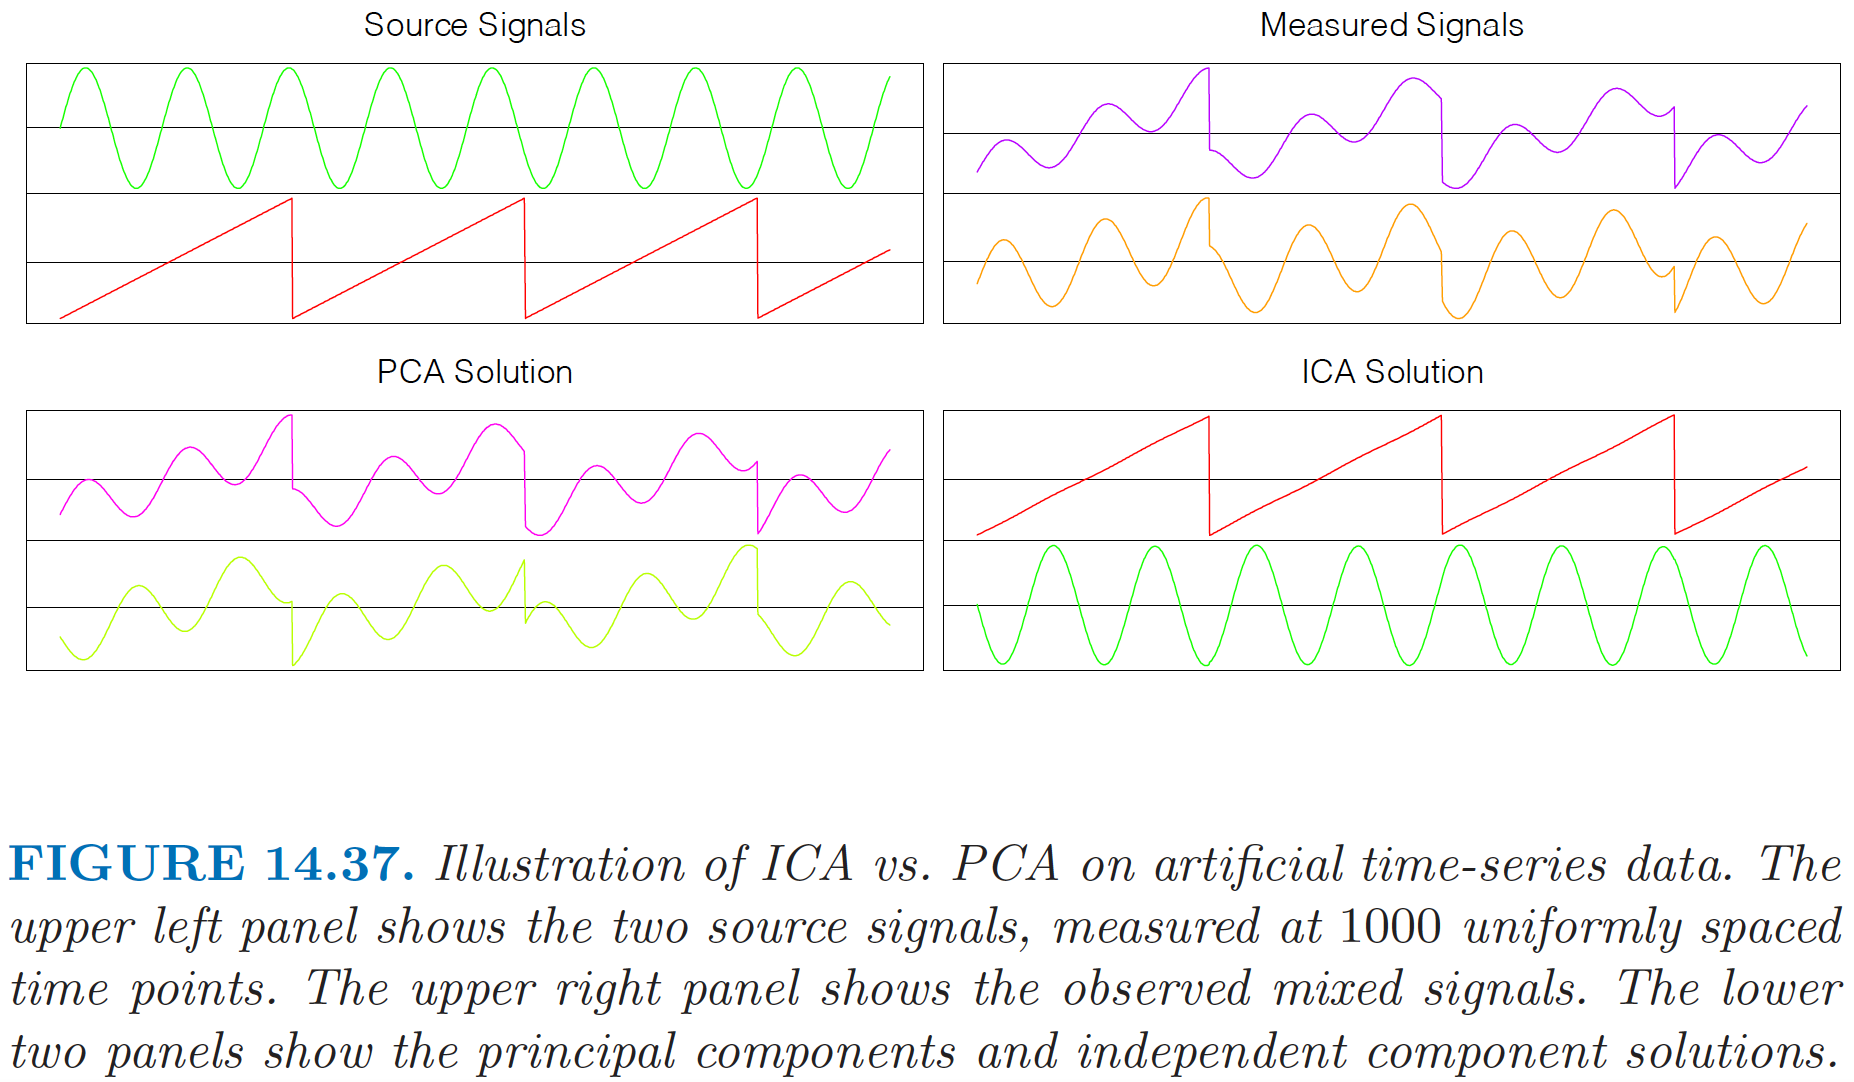

You can find this image (as well as the entire textbook for free!) [here](https://web.stanford.edu/~hastie/ElemStatLearn//printings/ESLII_print12_toc.pdf).

[Hastie et al.](https://web.stanford.edu/~hastie/ElemStatLearn/): 
> *ICA applied to multivariate data looks for a sequence of orthogonal projections such that the projected data look as far from Gaussian as possible. With pre-whitened data, this amounts to looking for
components that are as independent as possible.*

In short you want to ***find components that are maximally non-Gaussian***, since the sum of two or more random variables will be more Gaussian than either of the components individually (remember the **Central Limit Theorem**). *Hastie et al.* illustrate this as follows:

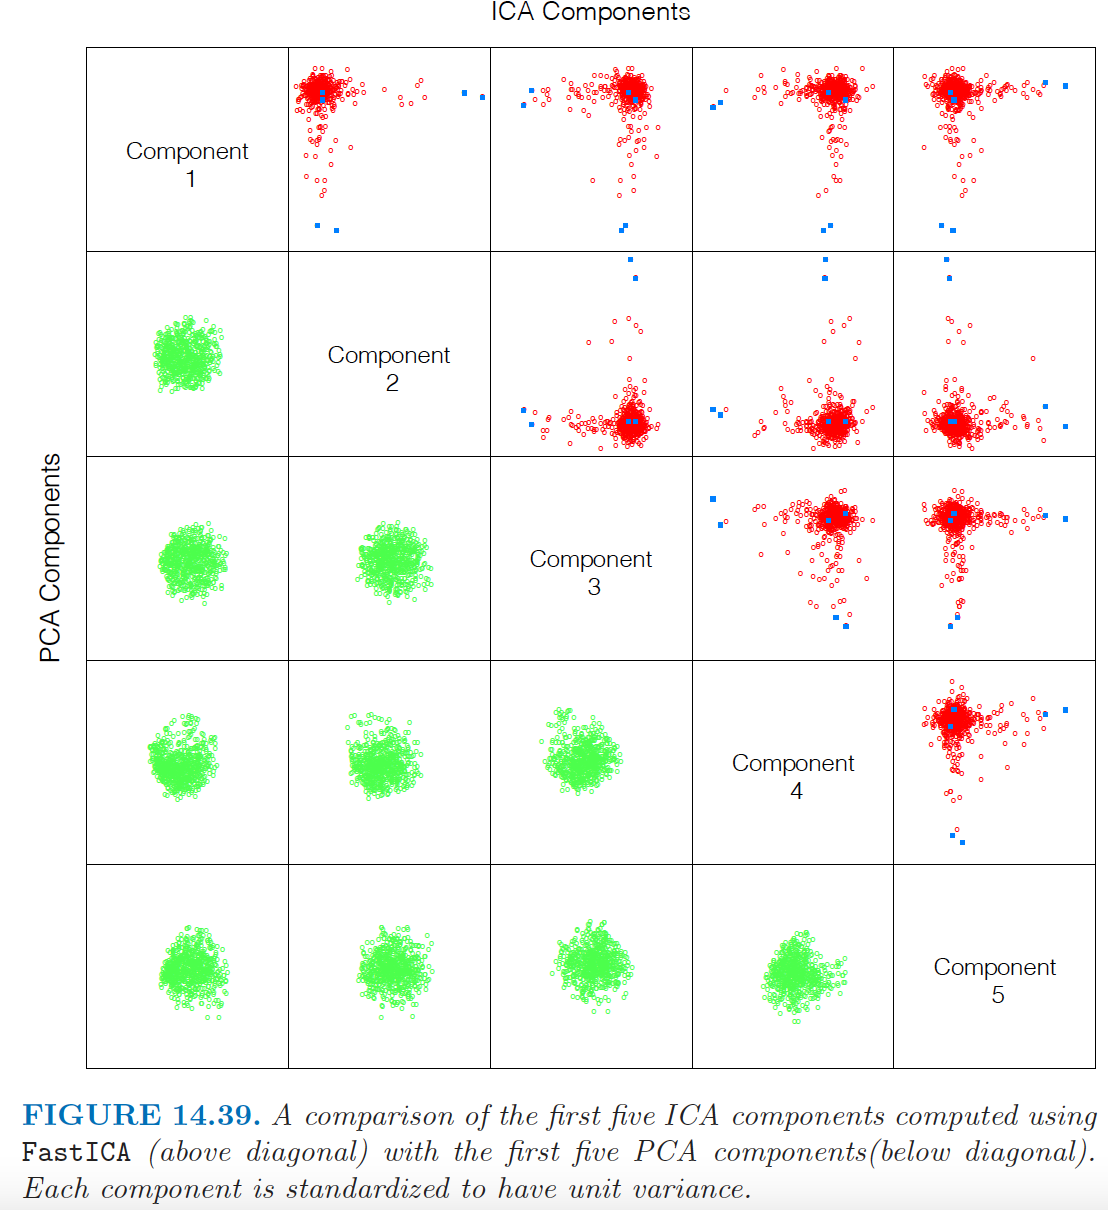

ICA is a good choice for a complex system with relatively independent components. For example a galaxy is roughly a linear combination of cool stars and hot stars, and a quasar is just a galaxy with others component from an accretion disk and emission line regions. **Ideally we want "eigenvectors" that are aligned with those physical traits/regions as opposed to abstract mathematical constructs.**

The basic call to the [FastICA algoirthm](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html) in Scikit-Learn looks like:

In [15]:
# Execute this cell
from sklearn.decomposition import FastICA

X = np.random.normal(size=(100,2)) # 100 objects in 2D
R = np.random.random((2,5)) # mixing matrix
X = np.dot(X,R) # Simulation of a 5D data space

ica = FastICA(n_components=2) # Now reproject to 2-D
ica.fit(X)

proj = ica.transform(X) # 100x2 projection of the data
comp = ica.components_ # 2x5 matrix of independent components
## sources = ica.sources_ # 100x2 matrix of sources

Execute the next 2 cells to produce a plot showing the ICA components of the SDSS spectra.

In [16]:
from astroML.datasets import sdss_corrected_spectra
from astroML.decorators import pickle_results

#------------------------------------------------------------
# Download data
data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()
spectra = sdss_corrected_spectra.reconstruct_spectra(data)
wavelengths = sdss_corrected_spectra.compute_wavelengths(data)

#----------------------------------------------------------------------
# Compute ICA
np.random.seed(500)
nrows = 500
n_components = 5
ind = np.random.randint(spectra.shape[0], size=nrows)

spec_mean = spectra[ind].mean(0)

ica = FastICA(n_components - 1)
ica.fit(spectra[ind])
ica_comp = np.vstack([spec_mean,ica.components_]) # Add the mean to the components

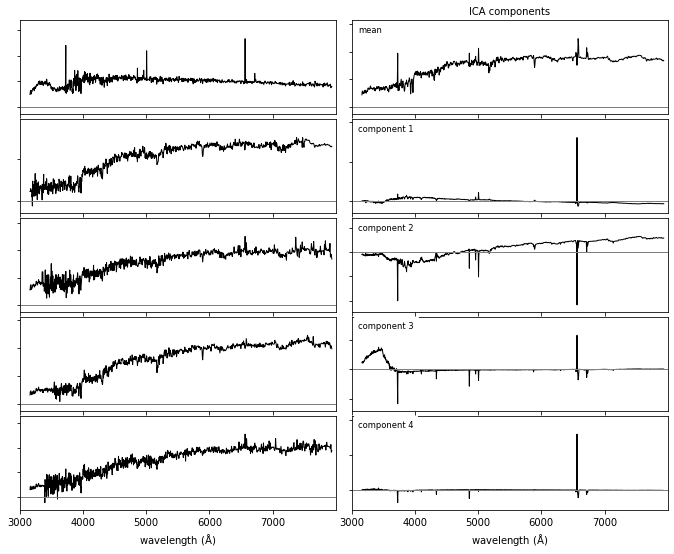

In [17]:
# Make plots
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05,
                    bottom=0.1, top=0.95, hspace=0.05)

titles = 'ICA components'

for j in range(n_components):
    
    # plot the components
    ax = fig.add_subplot(n_components, 2, 2*j+2)
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
    if j < n_components - 1:
        ax.xaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax.set_xlabel(r'wavelength ${\rm (\AA)}$')
    ax.plot(wavelengths, ica_comp[j], '-k', lw=1)

    # plot zero line
    xlim = [3000, 7999]
    ax.plot(xlim, [0, 0], '-', c='gray', lw=1)
    ax.set_xlim(xlim)

    # adjust y limits
    ylim = plt.ylim()
    dy = 0.05 * (ylim[1] - ylim[0])    
    ax.set_ylim(ylim[0] - dy, ylim[1] + 4 * dy)

    # plot the first j spectra
    ax2 = fig.add_subplot(n_components, 2, 2*j+1)
    ax2.yaxis.set_major_formatter(plt.NullFormatter())
    ax2.xaxis.set_major_locator(plt.MultipleLocator(1000))
    if j < n_components - 1:
        ax2.xaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax2.set_xlabel(r'wavelength ${\rm (\AA)}$')
    ax2.plot(wavelengths, spectra[j], '-k', lw=1)
    
    # plot zero line
    ax2.plot(xlim, [0, 0], '-', c='gray', lw=1)
    ax2.set_xlim(xlim)

    if j == 0:
        ax.set_title(titles, fontsize='medium')

    if j == 0:
        label = 'mean'
    else:
        label = 'component %i' % j

    # adjust y limits
    ylim = plt.ylim()
    dy = 0.05 * (ylim[1] - ylim[0])    
    ax2.set_ylim(ylim[0] - dy, ylim[1] + 4 * dy)


    ax.text(0.02, 0.95, label, transform=ax.transAxes,
            ha='left', va='top', bbox=dict(ec='w', fc='w'),
            fontsize='small')

plt.show()

ICA actually looks like it is picking up distinct line regions as the components.

As with PCA and NMF, we can similarly do a reconstruction:

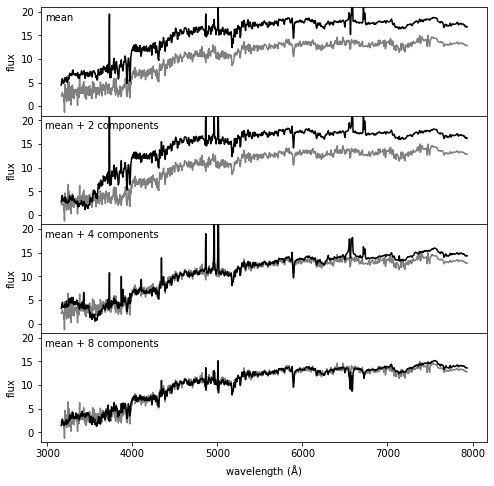

In [18]:
# Execute this cell
#------------------------------------------------------------
# Find the coefficients of a particular spectrum
spec = spectra[1]
evecs = data['evecs']
coeff = np.dot(evecs, spec - spec_mean)

#------------------------------------------------------------
# Plot the sequence of reconstructions
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(hspace=0)

for i, n in enumerate([0, 2, 4, 8]):
    ax = fig.add_subplot(411 + i)
    ax.plot(wavelengths, spec, '-', c='gray')
    ax.plot(wavelengths, spec_mean + np.dot(coeff[:n], evecs[:n]), '-k')

    if i < 3:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    ax.set_ylim(-2, 21)
    ax.set_ylabel('flux')

    if n == 0:
        text = "mean"
    elif n == 1:
        text = "mean + 1 component\n"
        #text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]
    else:
        text = "mean + %i components\n" % n
        #text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]
        
    ax.text(0.01, 0.95, text, ha='left', va='top', transform=ax.transAxes)

fig.axes[-1].set_xlabel(r'${\rm wavelength\ (\AA)}$')
plt.show()

Ivezic, Figure 7.7 compares the components found by the PCA, ICA, and NMF algorithms.  Their differences and similarities are quite interesting.

![Ivezic, Figure 7.4](http://www.astroml.org/_images/fig_spec_decompositions_1.png)

### Time to get you hands dirty! A noisy detector.

Three telescopes are monitoring the same astronomical event. Their time-series output is provided  at `solutions/noisydetector.npy`. These could be the outputs of three photometry CCD cameras we still need to calibrate, or the strain channel from a gravitational-wave detectors. 

The picture below from LIGO is a case where you have a ton of noise and tiny signals.

![](https://www.ligo.org/science/Publication-S6PE/Images/wave_examples_noise.gif)

The picture below shows exoplanets transits ([Zellem et al 2020](https://ui.adsabs.harvard.edu/abs/2020PASP..132e4401Z/abstract)). The signal is more evident there, but the key idea is the same: we're looking for some physics in noisy data, assuming we have multiple observations.

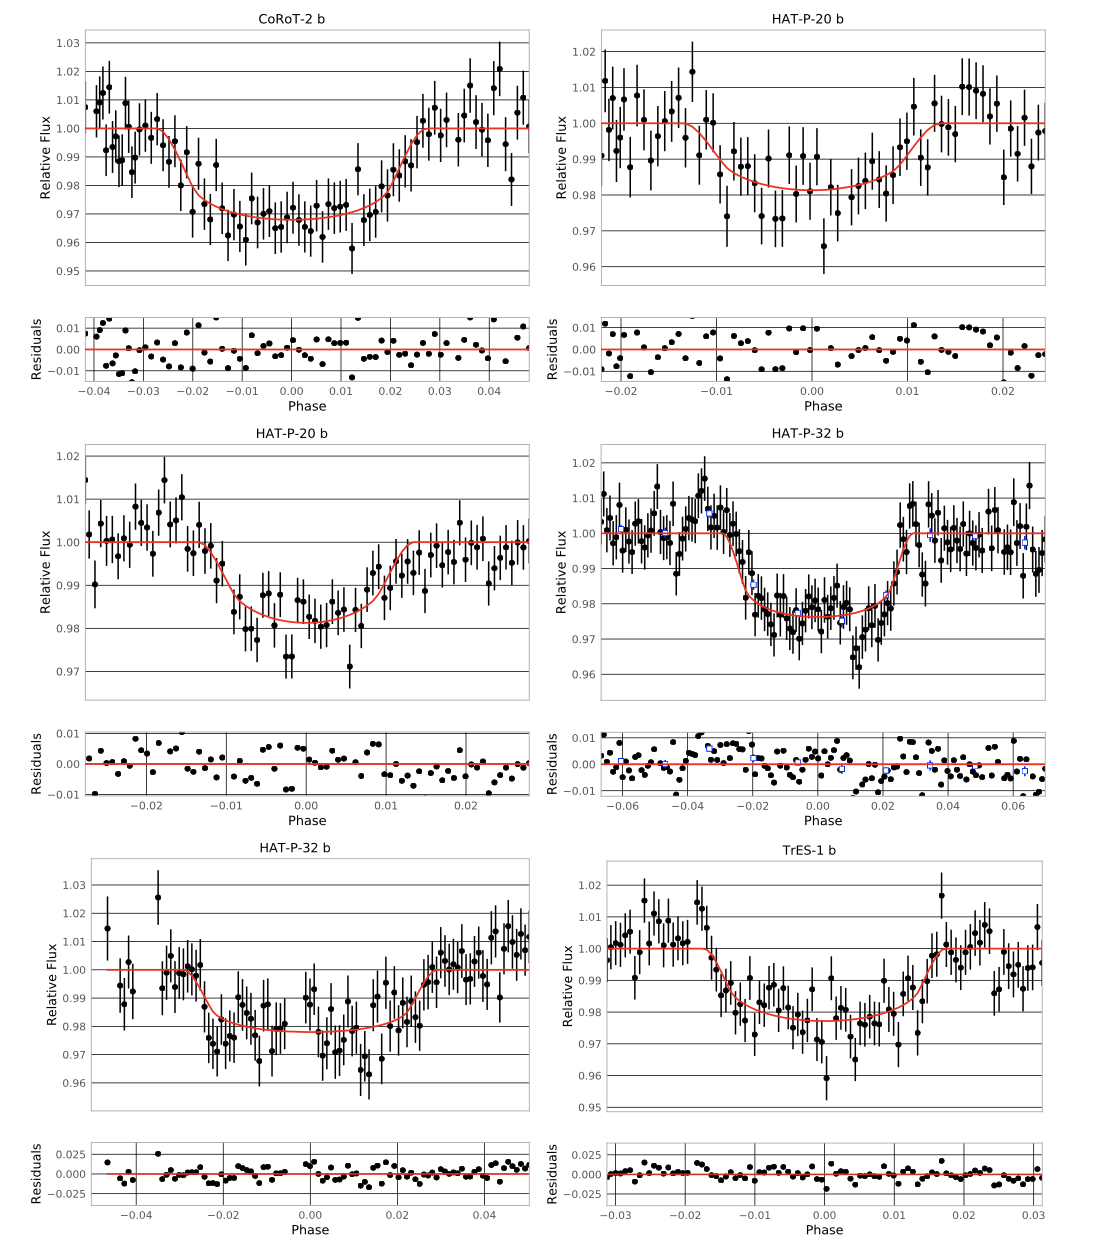



These is a sample of variable stars from [Szekely et al](https://arxiv.org/abs/astro-ph/0611663)

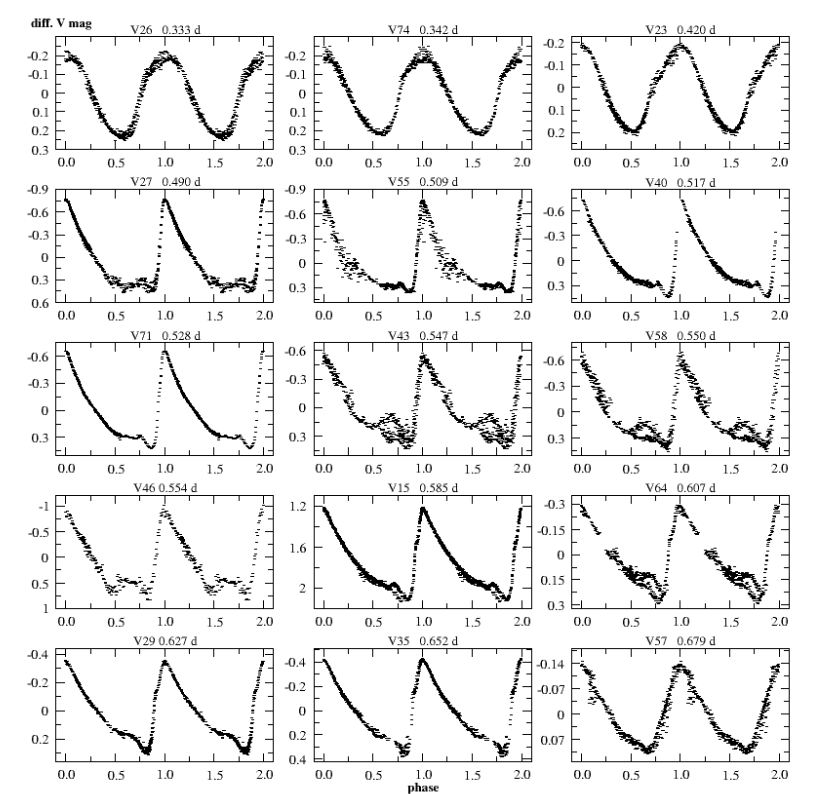

Our detectors measure the following outputs, which to me just looks like a pile of junk. Someone really forgot to read the telescope manual here!

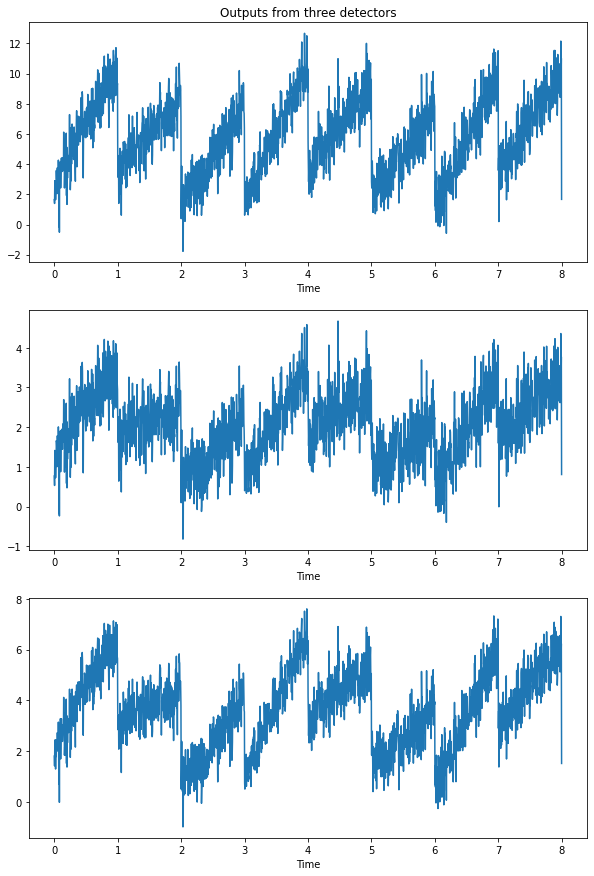

In [19]:
X=np.load('../solutions/noisydetector.npy')

time = np.linspace(0, 8, X.shape[0])

fig, axs = plt.subplots(3,figsize=(10,15))

for ax,s in zip(axs,X.T):
    ax.plot(time,s)
    ax.set_xlabel('Time')
axs[0].set_title('Outputs from three detectors');


In a realistic scenario, those jumps will have a physical meaning. Say for a satellite we need to [re-point the radio antennas](https://arxiv.org/abs/1907.04747) to send data down to Earth, and the whole thing shakes a bit. Or say the [the Starlink satellites](https://www.science.org/content/article/starlink-already-threatens-optical-astronomy-now-radio-astronomers-are-worried) are polluting your telescope data (I'm making this up, I don't really know what kind of data contamination they would cause!).


***Tasks***

1. You're observing a [Cepheid](https://en.wikipedia.org/wiki/Cepheid_variable) variable star, which is a source with an intrinsic (and presumably smooth) variability.  
2. Measure its period (that's crucial for [cosmology](https://en.wikipedia.org/wiki/Hubble%27s_law)!)
3. Estimate the error on your measurement.

(When detecting a signal, state-of-the-art gravitational-wave analysis make use of another tecnique called [matched filtering](https://en.wikipedia.org/wiki/Matched_filter) which, unfortunately, we do not have time to cover here. But PCA is used to classify instrumental artifacts, see e.g. [Powell et al 2005](https://arxiv.org/abs/1505.01299)).

[My exploration](https://github.com/dgerosa/astrostatistics_bicocca_2022/blob/main/solutions/S14_noisydetector.ipynb)